In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

from egci_bioacoustic_shifts import plot_EGCI

# Example Visualizations

In [8]:
"""
region
    svm
    div
    data
        soundscape [complexity, entropy, empty]
        focal [complexity, entropy, empty]

"""
with open("e1_results.json", "r") as f:
    e1_results = json.load(f)

regions = list(e1_results.keys())
np.array(e1_results["HSN"]["data"]["focal"][:2])

array([[0.61875004, 0.62510482, 0.78801685, ..., 0.6348675 , 0.6467756 ,
        0.73330915],
       [0.42321442, 0.39285118, 0.29815327, ..., 0.34069751, 0.39186219,
        0.36679122]])

In [9]:
len(regions)

6

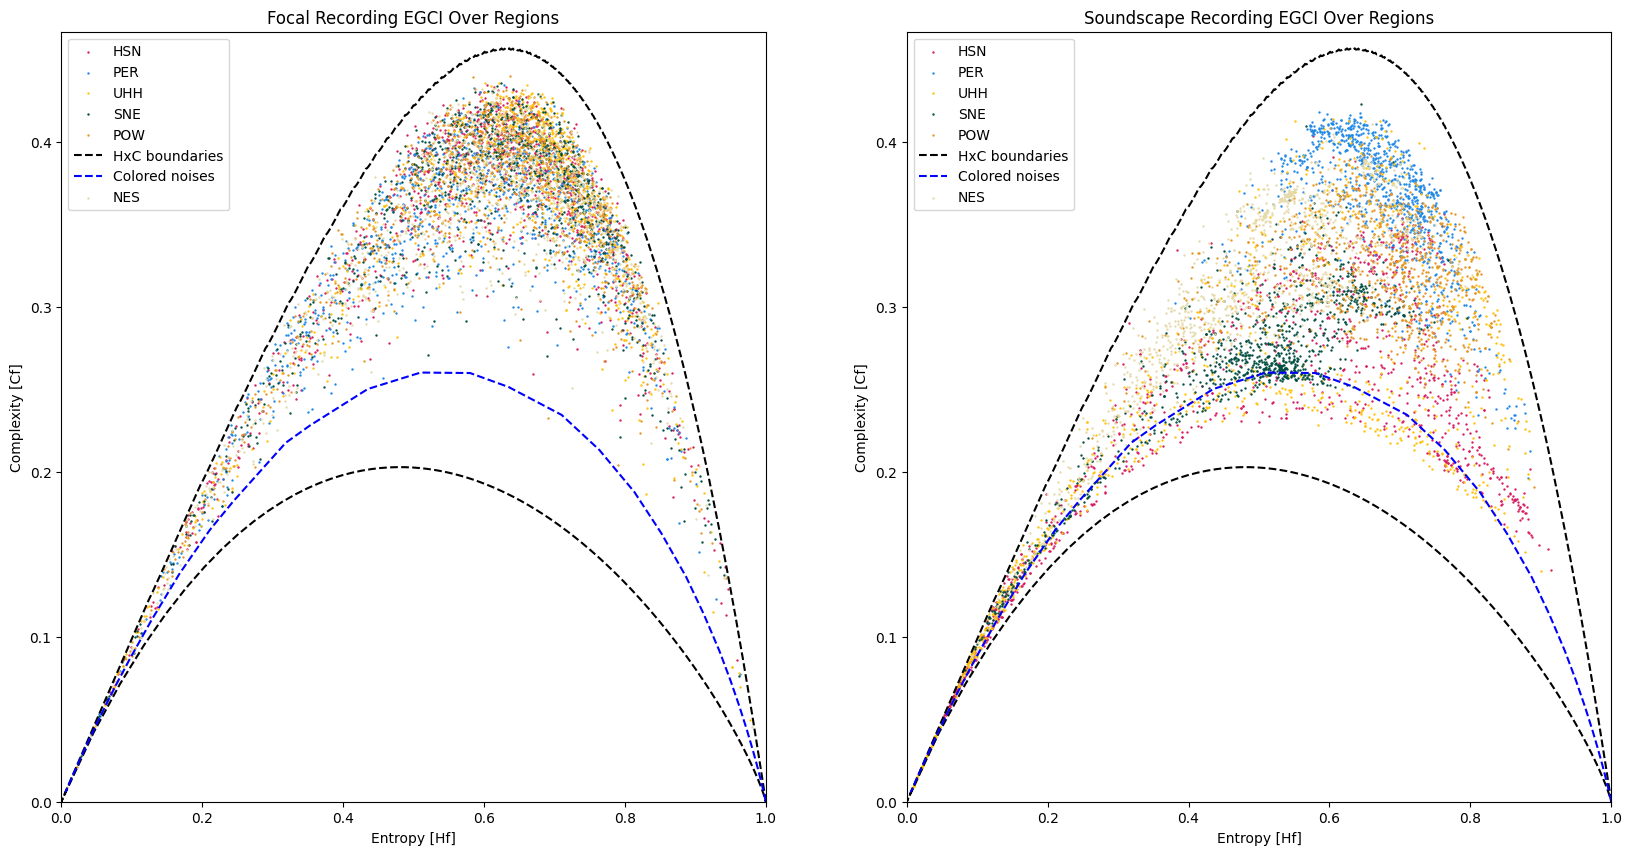

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40", "#E49626", "#E5DAA9"]



for i in range(len(regions)):
    set_boundries = i + 1 == len(regions)
    region = regions[i]
    ax1 = plot_EGCI(
        e1_results[region]["data"]["focal"][0],
        e1_results[region]["data"]["focal"][1],
        256,
        ax1,
        label=region,
        color=colors[i],
        plot_boundries=set_boundries
    )
    ax2 = plot_EGCI(
        e1_results[region]["data"]["soundscape"][0],
        e1_results[region]["data"]["soundscape"][1],
        256,
        ax2,
        label=region,
        color=colors[i],
        plot_boundries=set_boundries
    )

ax1.set_title("Focal Recording EGCI Over Regions")
ax2.set_title("Soundscape Recording EGCI Over Regions")
fig.show()

## Performance Metrics per region

In [11]:
for region in regions:
    print(
        region, 
        "\n\t",
        e1_results[region]["svm"],
        "\n\t",
        e1_results[region]["div"]
    )

HSN 
	 {'sample_stat': 0.9025, 'p-value': 0.0, 'null_hypo_trials': [0.4775, 0.5075, 0.47, 0.4975, 0.515, 0.51, 0.5025, 0.5425, 0.4625, 0.5225, 0.475, 0.5325, 0.505, 0.505, 0.4825, 0.515, 0.51, 0.4825, 0.515, 0.485, 0.4975, 0.51, 0.475, 0.465, 0.465, 0.51, 0.4925, 0.4575, 0.5075, 0.485, 0.49, 0.4575, 0.4675, 0.44, 0.4875, 0.4925, 0.53, 0.5075, 0.54, 0.4875, 0.485, 0.5025, 0.4725, 0.49, 0.5375, 0.4925, 0.4375, 0.4975, 0.5075, 0.4825, 0.5125, 0.4925, 0.55, 0.515, 0.515, 0.49, 0.54, 0.4825, 0.52, 0.51, 0.5225, 0.4775, 0.495, 0.48, 0.565, 0.51, 0.45, 0.455, 0.5225, 0.4975, 0.5225, 0.495, 0.5375, 0.51, 0.5225, 0.4925, 0.4725, 0.5375, 0.5325, 0.485, 0.525, 0.5175, 0.49, 0.49, 0.445, 0.505, 0.4675, 0.48, 0.49, 0.515, 0.4275, 0.505, 0.5075, 0.4975, 0.53, 0.52, 0.4875, 0.4625, 0.535, 0.4825]} 
	 {'Kullback-Leibler divergence Xeno-canto to Soundscapes': 0.20727493264230773, 'Kullback-Leibler divergence Soundscapes to Xeno-canto': 0.24286215336544395, 'Wasserstein Distance 2 Dimensional': 0.172342

# Experiment 2

In [12]:
"""
region
    svm
    div
    data
        soundscape [complexity, entropy, empty]
        focal [complexity, entropy, empty]

"""
with open("e2_results_check.json", "r") as f:
    e2_results = json.load(f)
e2_results

{'HSN': {'results': '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                   Loss   R-squared:                       0.550\nModel:                            OLS   Adj. R-squared:                  0.548\nMethod:                 Least Squares   F-statistic:                     404.7\nDate:                Fri, 18 Jul 2025   Prob (F-statistic):          9.89e-172\nTime:                        09:17:34   Log-Likelihood:                -222.21\nNo. Observations:                 998   AIC:                             452.4\nDf Residuals:                     994   BIC:                             472.0\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 co

In [13]:
for region in regions:
    print(region)
    print(e2_results[region]["results"])

HSN
                            OLS Regression Results                            
Dep. Variable:                   Loss   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     404.7
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          9.89e-172
Time:                        09:17:34   Log-Likelihood:                -222.21
No. Observations:                 998   AIC:                             452.4
Df Residuals:                     994   BIC:                             472.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8216      0.028     29.870     

# Experiment 3

In [ ]:
metrics = ["Kullback-Leibler divergence Xeno-canto to Soundscapes",
"Kullback-Leibler divergence Soundscapes to Xeno-canto",
"Wasserstein Distance 2 Dimensional"]

In [ ]:
with open("e3_results.json", "r") as f:
    e3_results = json.load(f)
e3_results

for region in regions:
    region_data = e3_results[region]
    print(region, 
          region_data["div"]["no_aug"][metrics[0]] - region_data["div"]["no_aug"][metrics[0]])